In [ ]:
#import snscrape.modules.twitter as sntwitter

# Define the search query
#query = "#gm crops"

# Define the columns for the DataFrame
#columns = ["id", "content", "date", "username", "url"]

# Create an empty DataFrame to store the results
#df = pd.DataFrame(columns=columns)

# Iterate through the search results and add each tweet to the DataFrame
#for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    #row = [tweet.id, tweet.content, tweet.date, tweet.user.username, tweet.url]
    #df.loc[len(df)] = row

# Print the DataFrame
#print(df.head())


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install SPARQLWrapper networkx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery("""
    SELECT DISTINCT ?entity WHERE {
        { ?entity dct:subject dbc:Genetic_engineering . }
        UNION
        { ?entity skos:broader dbc:Genetic_engineering . }
        UNION
        { ?entity dct:subject/dct:subject dbc:Genetic_engineering . }
    }
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

entities = [result['entity']['value'] for result in results['results']['bindings']]


In [ ]:
entities

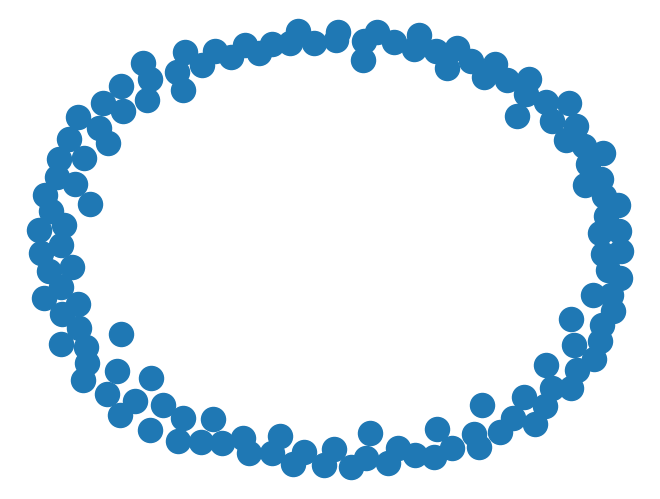

In [ ]:
import networkx as nx

G = nx.DiGraph()

for entity in entities:
    G.add_node(entity)
    
nx.draw(G)


In [ ]:
for entity in entities:
    sparql.setQuery(f"""
        SELECT DISTINCT ?relationship ?target WHERE {{
            <{entity}> ?relationship ?target .
            FILTER(regex(str(?target), "^http://dbpedia.org/resource"))
        }}
    """)
    results = sparql.query().convert()

    for result in results['results']['bindings']:
        target = result['target']['value']
        relationship = result['relationship']['value']

        if target in entities:
            G.add_edge(entity, target, relationship=relationship)


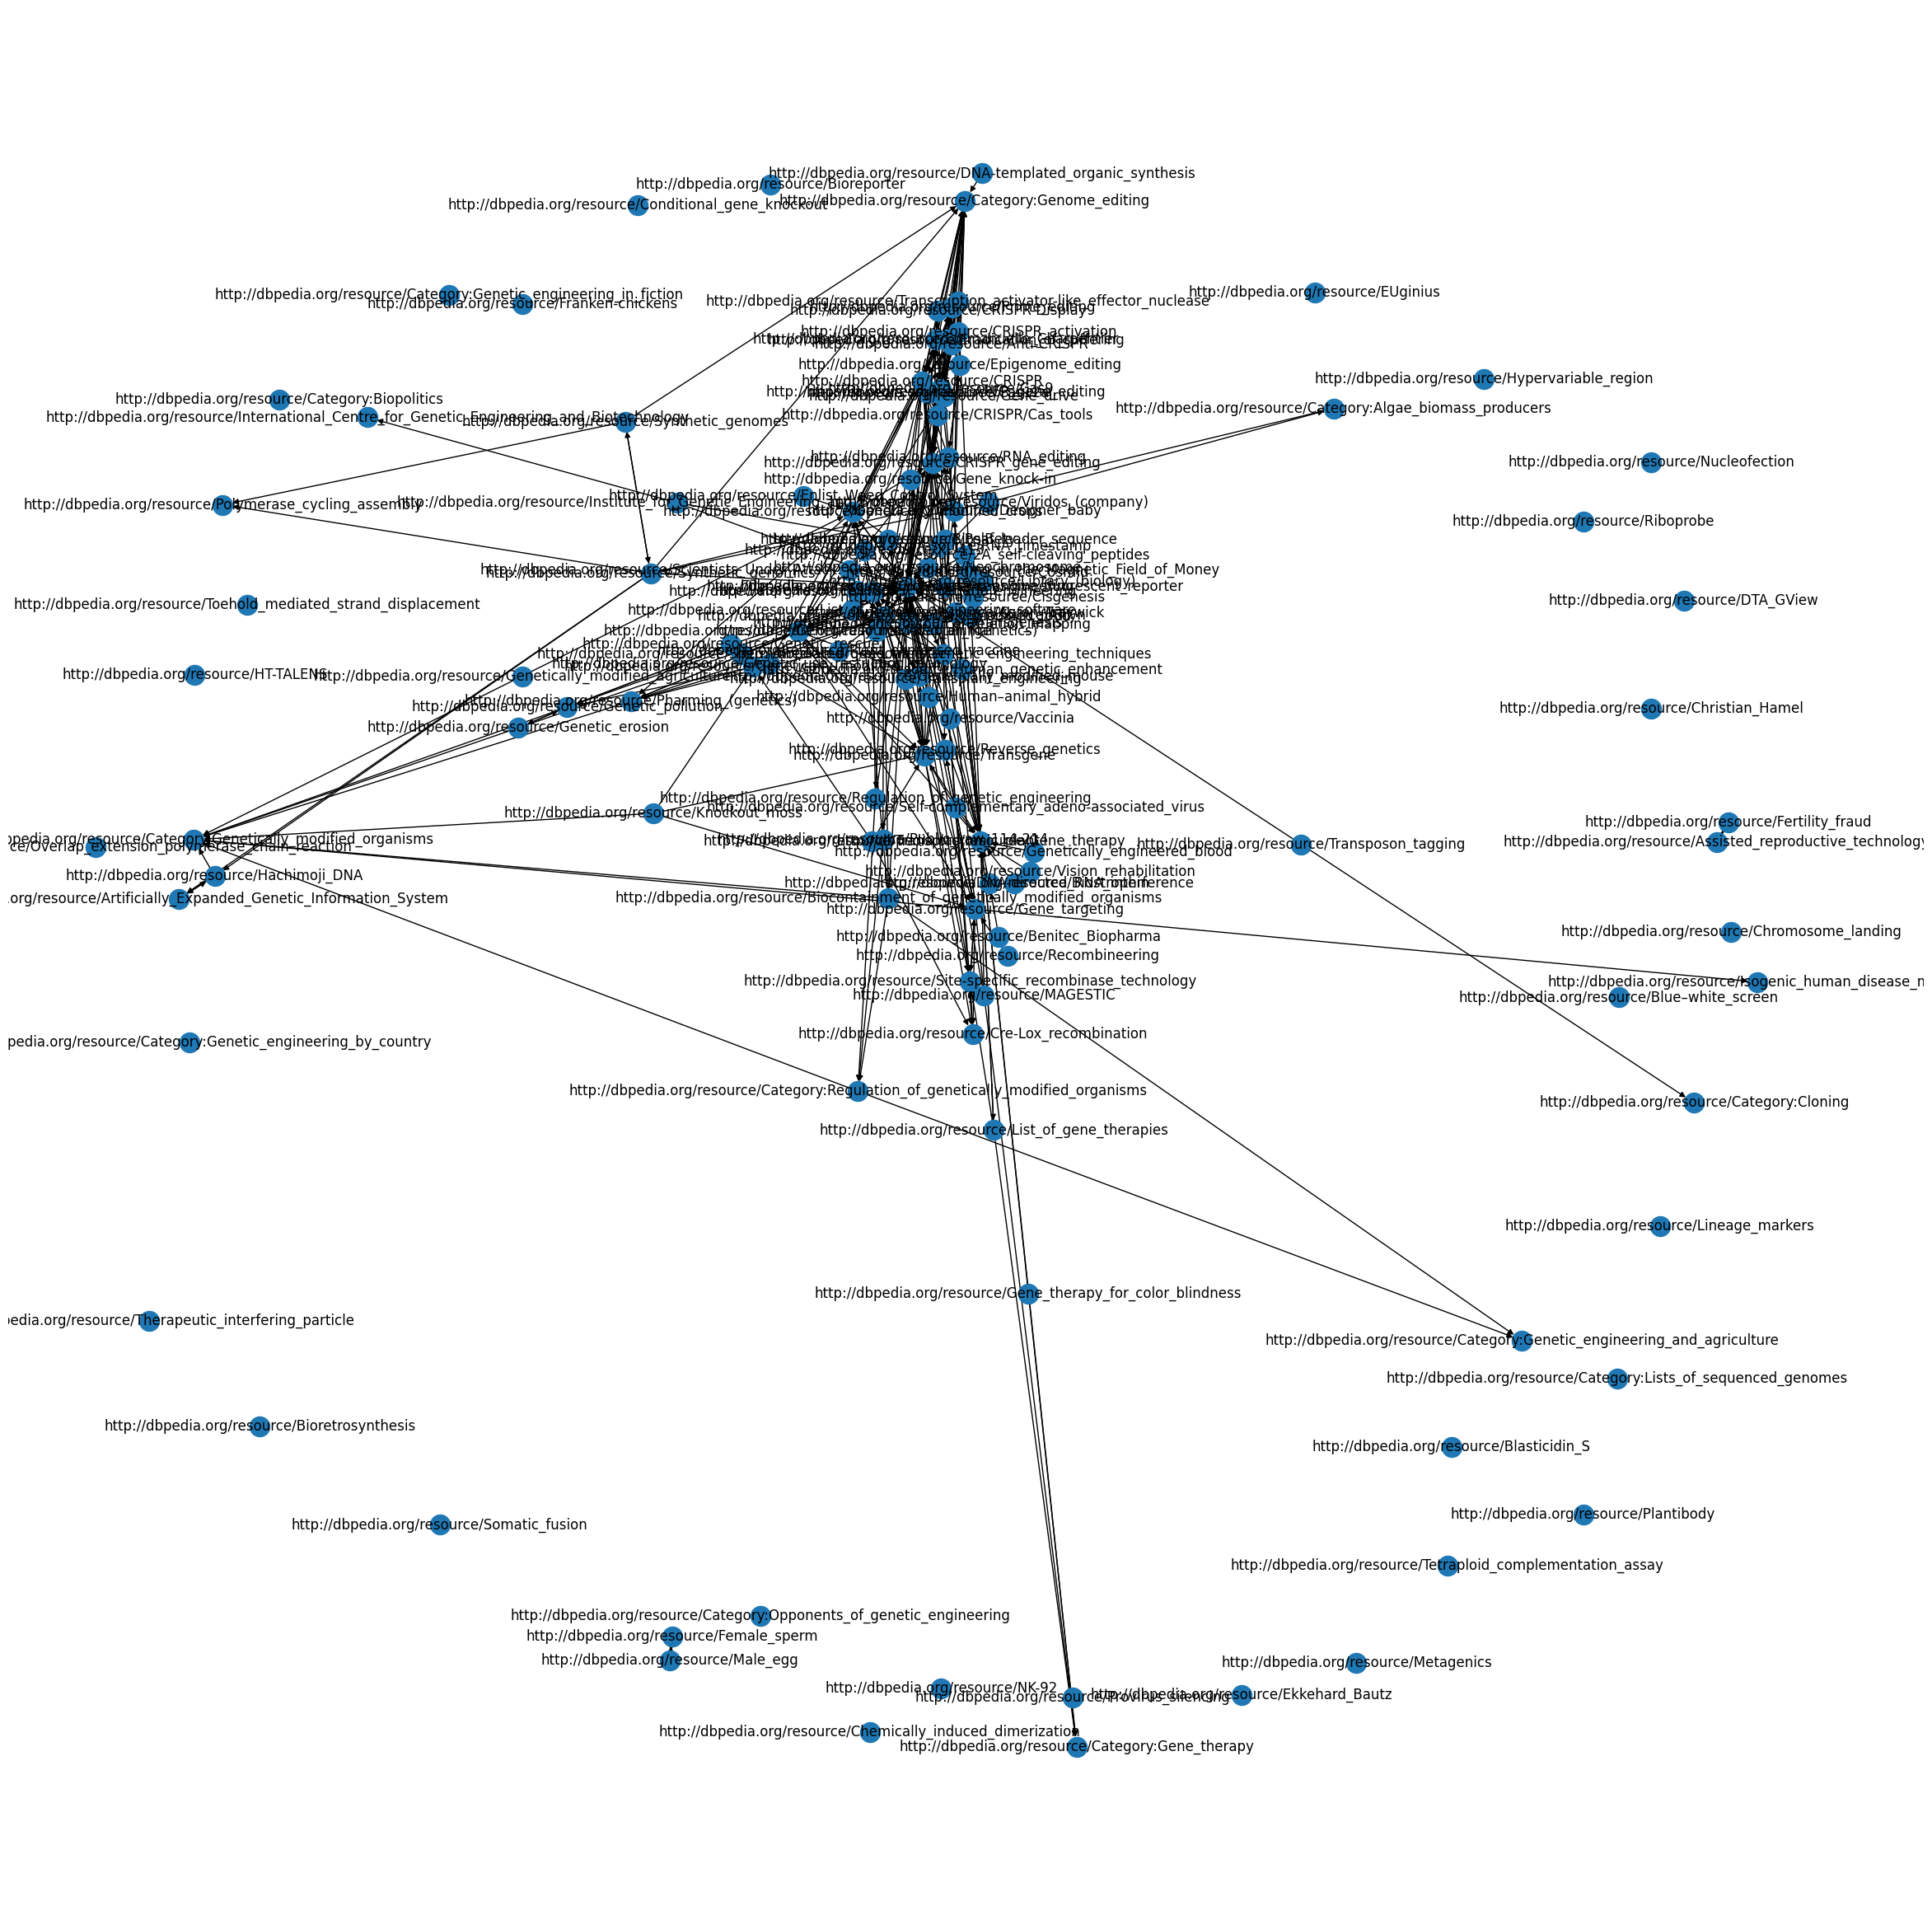

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spectral_layout(G)

# Draw the graph
fig, ax = plt.subplots(figsize=(30, 30))

nx.draw(G, with_labels=True)
plt.show()

### Degree Centrality

In [ ]:
import networkx as nx

# Convert the RDF graph to a networkx graph
g_nx = nx.Graph(G)

# Compute the degree centrality of the nodes
degree_centrality = nx.degree_centrality(g_nx)

# Print the degree centrality of the top 10 nodes
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_nodes:
    print(f"{node}: {centrality}")


http://dbpedia.org/resource/Genetic_engineering: 0.39230769230769236
http://dbpedia.org/resource/CRISPR: 0.19230769230769232
http://dbpedia.org/resource/Gene_therapy: 0.16923076923076924
http://dbpedia.org/resource/Category:Genome_editing: 0.14615384615384616
http://dbpedia.org/resource/CRISPR_gene_editing: 0.12307692307692308
http://dbpedia.org/resource/Transgene: 0.12307692307692308
http://dbpedia.org/resource/Genetically_modified_food: 0.1076923076923077
http://dbpedia.org/resource/Cas9: 0.1076923076923077
http://dbpedia.org/resource/Genetically_modified_animal: 0.1
http://dbpedia.org/resource/Genetically_modified_crops: 0.1


### Betweeness Centrality

In [ ]:
# Compute the degree centrality of the nodes
betweenness_centrality = nx.betweenness_centrality(g_nx)

# Print the degree centrality of the top 10 nodes
top_nodesbet = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_nodesbet:
    print(f"{node}: {centrality}")

http://dbpedia.org/resource/Genetic_engineering: 0.31856674032351096
http://dbpedia.org/resource/Gene_therapy: 0.08724501814640089
http://dbpedia.org/resource/CRISPR: 0.05179824837249942
http://dbpedia.org/resource/Synthetic_genomics: 0.040229975354285144
http://dbpedia.org/resource/Gene_targeting: 0.033698915131443366
http://dbpedia.org/resource/Transgene: 0.03300723933709733
http://dbpedia.org/resource/Genetically_modified_crops: 0.02770784709970199
http://dbpedia.org/resource/Category:Genome_editing: 0.027700349856257148
http://dbpedia.org/resource/Genetically_modified_animal: 0.026789448345285547
http://dbpedia.org/resource/Genetically_modified_food: 0.024141077108072517


### Closeness Centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(g_nx)

# Print the closeness centrality of the top 10 nodes
top_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_nodes:
    print(f"{node}: {centrality}")


http://dbpedia.org/resource/Genetic_engineering: 0.48889490790899237
http://dbpedia.org/resource/CRISPR: 0.38783841856467555
http://dbpedia.org/resource/Gene_therapy: 0.3712464006581654
http://dbpedia.org/resource/CRISPR_gene_editing: 0.3712464006581654
http://dbpedia.org/resource/Transcription_activator-like_effector_nuclease: 0.35785091197462326
http://dbpedia.org/resource/Transgene: 0.35601577909270216
http://dbpedia.org/resource/Genetically_modified_food: 0.35419937205651486
http://dbpedia.org/resource/Genetic_engineering_techniques: 0.34885968303053727
http://dbpedia.org/resource/Genetically_modified_crops: 0.34885968303053727
http://dbpedia.org/resource/Gene_drive: 0.3436785986290936


### Pagerank

In [ ]:
pagerank = nx.pagerank(g_nx)

# Print the PageRank of the top 10 nodes
top_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_nodes:
    print(f"{node}: {centrality}")


http://dbpedia.org/resource/Genetic_engineering: 0.0936797376293442
http://dbpedia.org/resource/Gene_therapy: 0.04021083033304598
http://dbpedia.org/resource/CRISPR: 0.03728679136432529
http://dbpedia.org/resource/Category:Genome_editing: 0.029480961301230096
http://dbpedia.org/resource/Transgene: 0.02639672337040202
http://dbpedia.org/resource/CRISPR_gene_editing: 0.023938413141365033
http://dbpedia.org/resource/Genetically_modified_food: 0.02321339078944059
http://dbpedia.org/resource/Genetically_modified_crops: 0.022042922578545385
http://dbpedia.org/resource/Genetically_modified_animal: 0.02150096366907995
http://dbpedia.org/resource/Cas9: 0.020390013256892613


### Shortest Path

In [ ]:
# Find the shortest path between nodes 1 and 5
shortest_path = nx.shortest_path(G, source="http://dbpedia.org/resource/Synthetic_genomes", target="http://dbpedia.org/resource/Category:Genetic_engineering_and_agriculture")
print(f"The shortest path between nodes is:\n {shortest_path} ")

The shortest path between nodes is:
 ['http://dbpedia.org/resource/Synthetic_genomes', 'http://dbpedia.org/resource/Synthetic_genomics', 'http://dbpedia.org/resource/Genetic_engineering', 'http://dbpedia.org/resource/Genetically_modified_food', 'http://dbpedia.org/resource/Public_Law_114-214', 'http://dbpedia.org/resource/Category:Regulation_of_genetically_modified_organisms', 'http://dbpedia.org/resource/Category:Genetic_engineering_and_agriculture'] 


In [ ]:
#http://dbpedia.org/resource/Site-specific_recombinase_technology and http://dbpedia.org/resource/Biosafety

#http://dbpedia.org/resource/Synthetic_genomes and http://dbpedia.org/resource/Category:Genetic_engineering_and_agriculture